In [8]:
import pandas as pd

vaccine = pd.read_csv('sentiments_vacc.csv')
env = pd.read_csv('sentiments_env.csv')

In [27]:
env.columns

Index(['date', 'sender_username_x', 'sender_first_name_x',
       'sender_last_name_x', 'views', 'emoji_reactions', 'sender_username_y',
       'sender_first_name_y', 'sender_last_name_y', 'IDs', 'cleaned',
       'removed_count', 'classification', 'Pol_cleaned', 'Sub_cleaned', 'year',
       'Pol_sent_clean', 'Sub_sent_clean', 'vad_score', 'vad_comp', 'vad_sent',
       'emo_core', 'norm_vader', 'norm_emo', 'combined_score', 'FullSents'],
      dtype='object')

In [9]:
env['vad_sent']

0        Positive
1        Positive
2        Positive
3        Negative
4        Negative
           ...   
22182    Negative
22183    Positive
22184    Negative
22185     Neutral
22186    Negative
Name: vad_sent, Length: 22187, dtype: object

In [10]:
vaccine['vad_sent']

0        Positive
1        Negative
2        Positive
3        Negative
4         Neutral
           ...   
34505    Positive
34506    Negative
34507    Positive
34508    Negative
34509    Positive
Name: vad_sent, Length: 34510, dtype: object

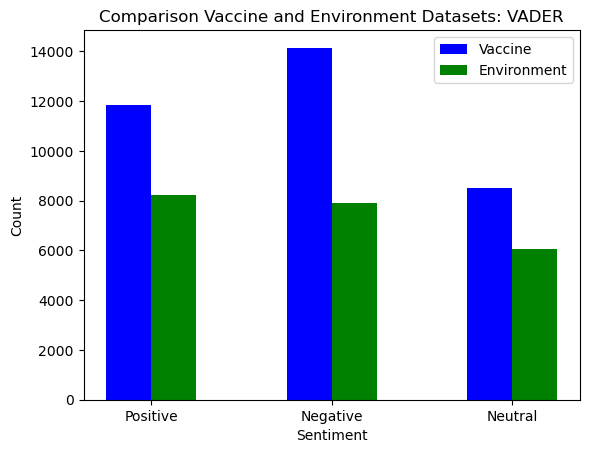

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Count sentiment labels for each dataset
vaccine_sentiments = vaccine['vad_sent'].value_counts().reindex(['Positive', 'Negative', 'Neutral'], fill_value=0)
env_sentiments = env['vad_sent'].value_counts().reindex(['Positive', 'Negative', 'Neutral'], fill_value=0)

# Plotting
bar_width = 0.25
index = np.arange(len(vaccine_sentiments))

plt.bar(index, vaccine_sentiments, bar_width, label='Vaccine', color='blue')
plt.bar(index + bar_width, env_sentiments, bar_width, label='Environment', color='green')

plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Comparison Vaccine and Environment Datasets: VADER')
plt.xticks(index + bar_width / 2, vaccine_sentiments.index)
plt.legend()
plt.show()


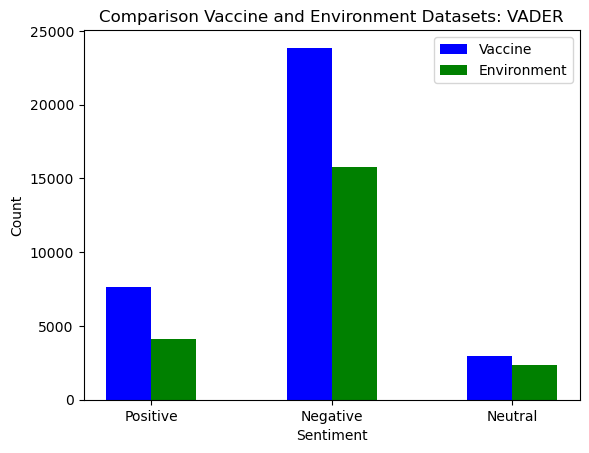

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Count sentiment labels for each dataset
vaccine_sentiments = vaccine['FullSents'].value_counts().reindex(['Positive', 'Negative', 'Neutral'], fill_value=0)
env_sentiments = env['FullSents'].value_counts().reindex(['Positive', 'Negative', 'Neutral'], fill_value=0)

# Plotting
bar_width = 0.25
index = np.arange(len(vaccine_sentiments))

plt.bar(index, vaccine_sentiments, bar_width, label='Vaccine', color='blue')
plt.bar(index + bar_width, env_sentiments, bar_width, label='Environment', color='green')

plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Comparison Vaccine and Environment Datasets: VADER')
plt.xticks(index + bar_width / 2, vaccine_sentiments.index)
plt.legend()
plt.show()


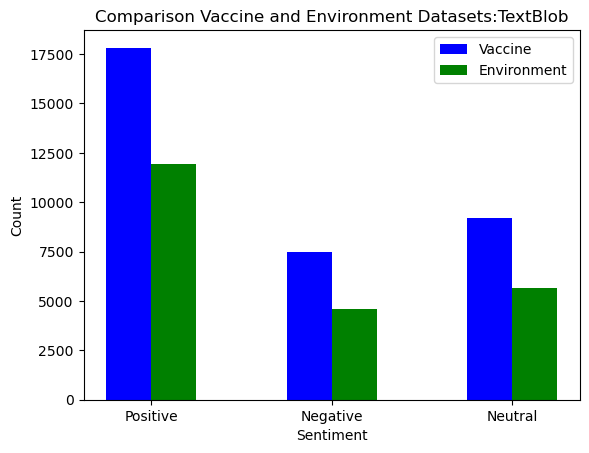

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Count sentiment labels for each dataset
vaccine_sentiments = vaccine['Pol_sent_clean'].value_counts().reindex(['Positive', 'Negative', 'Neutral'], fill_value=0)
env_sentiments = env['Pol_sent_clean'].value_counts().reindex(['Positive', 'Negative', 'Neutral'], fill_value=0)

# Plotting
bar_width = 0.25
index = np.arange(len(vaccine_sentiments))

plt.bar(index, vaccine_sentiments, bar_width, label='Vaccine', color='blue')
plt.bar(index + bar_width, env_sentiments, bar_width, label='Environment', color='green')

plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Comparison Vaccine and Environment Datasets:TextBlob')
plt.xticks(index + bar_width / 2, vaccine_sentiments.index)
plt.legend()
plt.show()


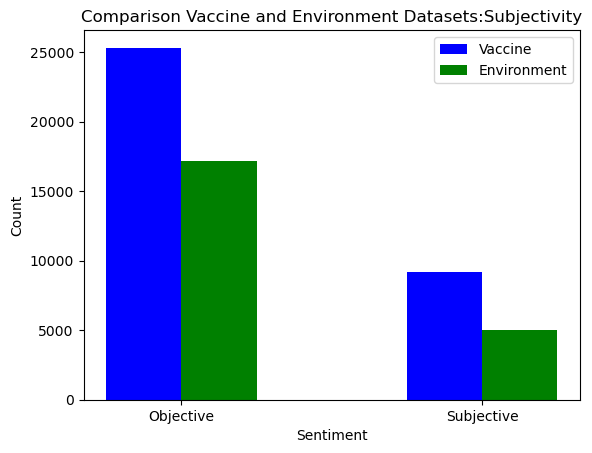

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Count sentiment labels for each dataset
vaccine_sentiments = vaccine['Sub_sent_clean'].value_counts().reindex(['Objective', 'Subjective'], fill_value=0)
env_sentiments = env['Sub_sent_clean'].value_counts().reindex(['Objective', 'Subjective'], fill_value=0)

# Plotting
bar_width = 0.25
index = np.arange(len(vaccine_sentiments))

plt.bar(index, vaccine_sentiments, bar_width, label='Vaccine', color='blue')
plt.bar(index + bar_width, env_sentiments, bar_width, label='Environment', color='green')

plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Comparison Vaccine and Environment Datasets:Subjectivity')
plt.xticks(index + bar_width / 2, vaccine_sentiments.index)
plt.legend()
plt.show()


# Bots and Sentiments 

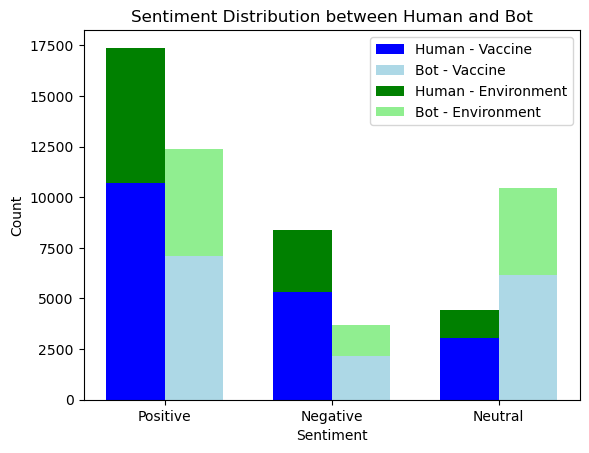

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'vaccine' and 'env' are your datasets
# Load datasets
vaccine = pd.read_csv('sentiments_vacc.csv')
env = pd.read_csv('sentiments_env.csv')

# Assuming 'label' column contains sentiment labels (positive, negative, neutral)
# and 'classification' column contains human or bot classifications

# Group by classification and count sentiment labels for each group
vaccine_grouped = vaccine.groupby('classification')['Pol_sent_clean'].value_counts().unstack(fill_value=0)
env_grouped = env.groupby('classification')['Pol_sent_clean'].value_counts().unstack(fill_value=0)

# Plotting
labels = ['Positive', 'Negative', 'Neutral']
bar_width = 0.35
index = np.arange(len(labels))

fig, ax = plt.subplots()

human_vaccine_counts = vaccine_grouped.loc['human'].reindex(labels, fill_value=0)
bot_vaccine_counts = vaccine_grouped.loc['bot'].reindex(labels, fill_value=0)

human_env_counts = env_grouped.loc['human'].reindex(labels, fill_value=0)
bot_env_counts = env_grouped.loc['bot'].reindex(labels, fill_value=0)

ax.bar(index - bar_width/2, human_vaccine_counts, bar_width, label='Human - Vaccine', color='blue')
ax.bar(index + bar_width/2, bot_vaccine_counts, bar_width, label='Bot - Vaccine', color='lightblue')
ax.bar(index - bar_width/2, human_env_counts, bar_width, label='Human - Environment', color='green', bottom=human_vaccine_counts)
ax.bar(index + bar_width/2, bot_env_counts, bar_width, label='Bot - Environment', color='lightgreen', bottom=bot_vaccine_counts)

ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
ax.set_title('Sentiment Distribution between Human and Bot')
ax.set_xticks(index)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


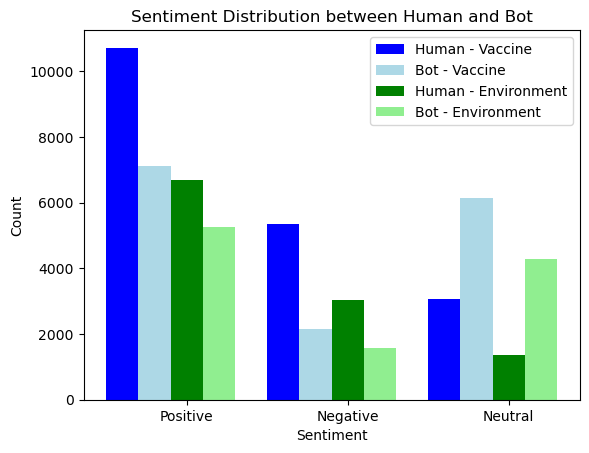

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'vaccine' and 'env' are your datasets
# Load datasets
vaccine = pd.read_csv('sentiments_vacc.csv')
env = pd.read_csv('sentiments_env.csv')

# Assuming 'label' column contains sentiment labels (positive, negative, neutral)
# and 'classification' column contains human or bot classifications

# Group by classification and count sentiment labels for each group
vaccine_grouped = vaccine.groupby(['classification', 'Pol_sent_clean']).size().unstack(fill_value=0)
env_grouped = env.groupby(['classification', 'Pol_sent_clean']).size().unstack(fill_value=0)

# Plotting
labels = ['Positive', 'Negative', 'Neutral']
bar_width = 0.2
index = np.arange(len(labels))

fig, ax = plt.subplots()

human_vaccine_counts = vaccine_grouped.loc['human'].reindex(labels, fill_value=0)
bot_vaccine_counts = vaccine_grouped.loc['bot'].reindex(labels, fill_value=0)

human_env_counts = env_grouped.loc['human'].reindex(labels, fill_value=0)
bot_env_counts = env_grouped.loc['bot'].reindex(labels, fill_value=0)

ax.bar(index - bar_width, human_vaccine_counts, bar_width, label='Human - Vaccine', color='blue')
ax.bar(index, bot_vaccine_counts, bar_width, label='Bot - Vaccine', color='lightblue')
ax.bar(index + bar_width, human_env_counts, bar_width, label='Human - Environment', color='green')
ax.bar(index + 2*bar_width, bot_env_counts, bar_width, label='Bot - Environment', color='lightgreen')

ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
ax.set_title('Sentiment Distribution between Human and Bot')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


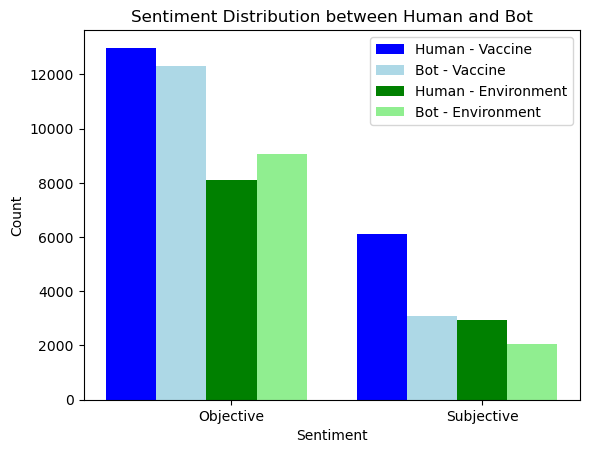

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'vaccine' and 'env' are your datasets
# Load datasets
vaccine = pd.read_csv('sentiments_vacc.csv')
env = pd.read_csv('sentiments_env.csv')

# Assuming 'label' column contains sentiment labels (positive, negative, neutral)
# and 'classification' column contains human or bot classifications

# Group by classification and count sentiment labels for each group
vaccine_grouped = vaccine.groupby(['classification', 'Sub_sent_clean']).size().unstack(fill_value=0)
env_grouped = env.groupby(['classification', 'Sub_sent_clean']).size().unstack(fill_value=0)

# Plotting
labels = ['Objective', 'Subjective']
bar_width = 0.2
index = np.arange(len(labels))

fig, ax = plt.subplots()

human_vaccine_counts = vaccine_grouped.loc['human'].reindex(labels, fill_value=0)
bot_vaccine_counts = vaccine_grouped.loc['bot'].reindex(labels, fill_value=0)

human_env_counts = env_grouped.loc['human'].reindex(labels, fill_value=0)
bot_env_counts = env_grouped.loc['bot'].reindex(labels, fill_value=0)

ax.bar(index - bar_width, human_vaccine_counts, bar_width, label='Human - Vaccine', color='blue')
ax.bar(index, bot_vaccine_counts, bar_width, label='Bot - Vaccine', color='lightblue')
ax.bar(index + bar_width, human_env_counts, bar_width, label='Human - Environment', color='green')
ax.bar(index + 2*bar_width, bot_env_counts, bar_width, label='Bot - Environment', color='lightgreen')

ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
ax.set_title('Sentiment Distribution between Human and Bot')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


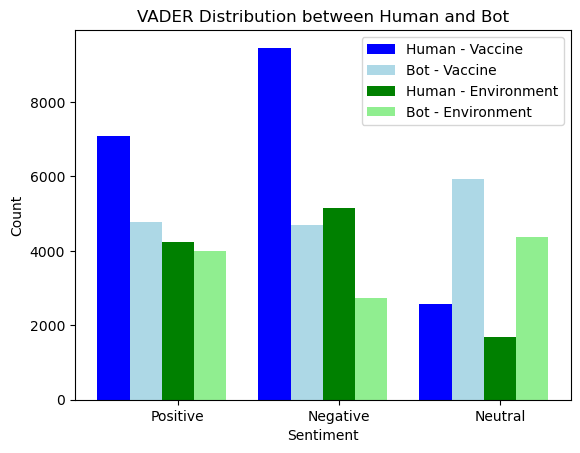

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'vaccine' and 'env' are your datasets
# Load datasets
vaccine = pd.read_csv('sentiments_vacc.csv')
env = pd.read_csv('sentiments_env.csv')

# Assuming 'label' column contains sentiment labels (positive, negative, neutral)
# and 'classification' column contains human or bot classifications

# Group by classification and count sentiment labels for each group
vaccine_grouped = vaccine.groupby(['classification', 'vad_sent']).size().unstack(fill_value=0)
env_grouped = env.groupby(['classification', 'vad_sent']).size().unstack(fill_value=0)

# Plotting
labels = ['Positive', 'Negative', 'Neutral']
bar_width = 0.2
index = np.arange(len(labels))

fig, ax = plt.subplots()

human_vaccine_counts = vaccine_grouped.loc['human'].reindex(labels, fill_value=0)
bot_vaccine_counts = vaccine_grouped.loc['bot'].reindex(labels, fill_value=0)

human_env_counts = env_grouped.loc['human'].reindex(labels, fill_value=0)
bot_env_counts = env_grouped.loc['bot'].reindex(labels, fill_value=0)

ax.bar(index - bar_width, human_vaccine_counts, bar_width, label='Human - Vaccine', color='blue')
ax.bar(index, bot_vaccine_counts, bar_width, label='Bot - Vaccine', color='lightblue')
ax.bar(index + bar_width, human_env_counts, bar_width, label='Human - Environment', color='green')
ax.bar(index + 2*bar_width, bot_env_counts, bar_width, label='Bot - Environment', color='lightgreen')

ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
ax.set_title('VADER Distribution between Human and Bot')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


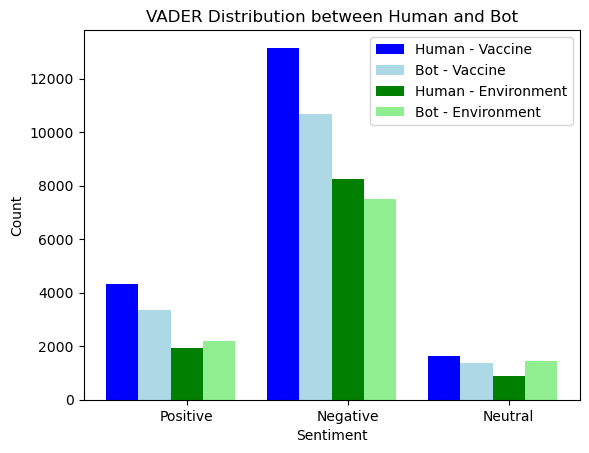

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'vaccine' and 'env' are your datasets
# Load datasets
vaccine = pd.read_csv('sentiments_vacc.csv')
env = pd.read_csv('sentiments_env.csv')

# Assuming 'label' column contains sentiment labels (positive, negative, neutral)
# and 'classification' column contains human or bot classifications

# Group by classification and count sentiment labels for each group
vaccine_grouped = vaccine.groupby(['classification', 'FullSents']).size().unstack(fill_value=0)
env_grouped = env.groupby(['classification', 'FullSents']).size().unstack(fill_value=0)

# Plotting
labels = ['Positive', 'Negative', 'Neutral']
bar_width = 0.2
index = np.arange(len(labels))

fig, ax = plt.subplots()

human_vaccine_counts = vaccine_grouped.loc['human'].reindex(labels, fill_value=0)
bot_vaccine_counts = vaccine_grouped.loc['bot'].reindex(labels, fill_value=0)

human_env_counts = env_grouped.loc['human'].reindex(labels, fill_value=0)
bot_env_counts = env_grouped.loc['bot'].reindex(labels, fill_value=0)

ax.bar(index - bar_width, human_vaccine_counts, bar_width, label='Human - Vaccine', color='blue')
ax.bar(index, bot_vaccine_counts, bar_width, label='Bot - Vaccine', color='lightblue')
ax.bar(index + bar_width, human_env_counts, bar_width, label='Human - Environment', color='green')
ax.bar(index + 2*bar_width, bot_env_counts, bar_width, label='Bot - Environment', color='lightgreen')

ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
ax.set_title('VADER Distribution between Human and Bot')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


# FOUR DATASETS 

In [41]:
anti_vacc = pd.read_csv('sentiments_anti_vacc_corpus.csv', low_memory=False)
pro_vacc = pd.read_csv('sentiments_pro_vacc_corpus.csv', low_memory=False)
anti_env = pd.read_csv('sentiments_anti_env_corpus.csv', low_memory=False)
pro_env = pd.read_csv('sentiments_pro_env_corpus.csv', low_memory=False)

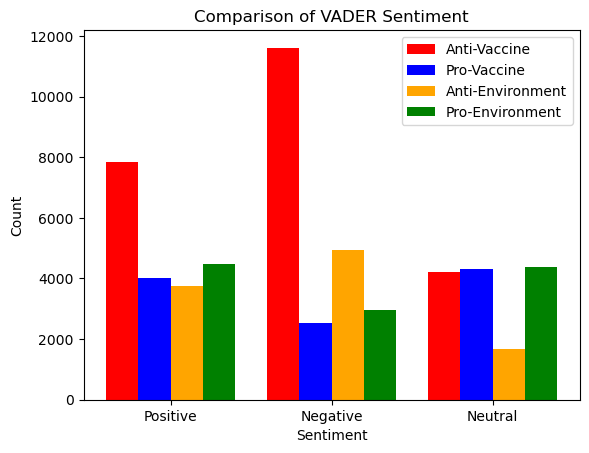

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Count sentiment labels for each dataset
anti_vacc_sentiments = anti_vacc['vad_sent'].value_counts().reindex(['Positive', 'Negative', 'Neutral'], fill_value=0)
pro_vacc_sentiments = pro_vacc['vad_sent'].value_counts().reindex(['Positive', 'Negative', 'Neutral'], fill_value=0)
anti_env_sentiments = anti_env['vad_sent'].value_counts().reindex(['Positive', 'Negative', 'Neutral'], fill_value=0)
pro_env_sentiments = pro_env['vad_sent'].value_counts().reindex(['Positive', 'Negative', 'Neutral'], fill_value=0)

# Plotting
bar_width = 0.2
index = np.arange(len(anti_vacc_sentiments))

plt.bar(index - 1.5*bar_width, anti_vacc_sentiments, bar_width, label='Anti-Vaccine', color='red')
plt.bar(index - 0.5*bar_width, pro_vacc_sentiments, bar_width, label='Pro-Vaccine', color='blue')
plt.bar(index + 0.5*bar_width, anti_env_sentiments, bar_width, label='Anti-Environment', color='orange')
plt.bar(index + 1.5*bar_width, pro_env_sentiments, bar_width, label='Pro-Environment', color='green')

plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Comparison of VADER Sentiment')
plt.xticks(index, ['Positive', 'Negative', 'Neutral'])
plt.legend()
plt.show()


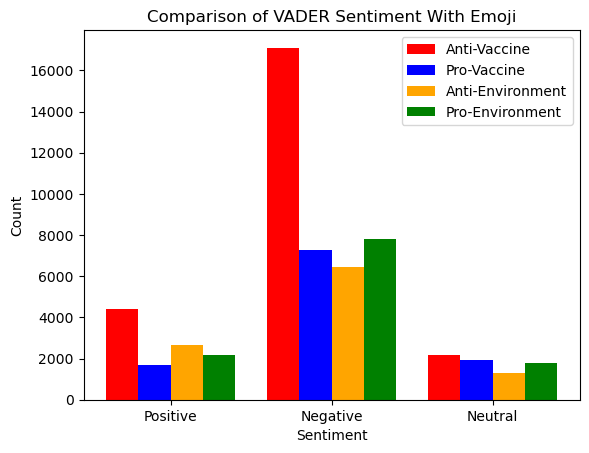

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Count sentiment labels for each dataset
anti_vacc_sentiments = anti_vacc['FullSents'].value_counts().reindex(['Positive', 'Negative', 'Neutral'], fill_value=0)
pro_vacc_sentiments = pro_vacc['FullSents'].value_counts().reindex(['Positive', 'Negative', 'Neutral'], fill_value=0)
anti_env_sentiments = anti_env['FullSents'].value_counts().reindex(['Positive', 'Negative', 'Neutral'], fill_value=0)
pro_env_sentiments = pro_env['FullSents'].value_counts().reindex(['Positive', 'Negative', 'Neutral'], fill_value=0)

# Plotting
bar_width = 0.2
index = np.arange(len(anti_vacc_sentiments))

plt.bar(index - 1.5*bar_width, anti_vacc_sentiments, bar_width, label='Anti-Vaccine', color='red')
plt.bar(index - 0.5*bar_width, pro_vacc_sentiments, bar_width, label='Pro-Vaccine', color='blue')
plt.bar(index + 0.5*bar_width, anti_env_sentiments, bar_width, label='Anti-Environment', color='orange')
plt.bar(index + 1.5*bar_width, pro_env_sentiments, bar_width, label='Pro-Environment', color='green')

plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Comparison of VADER Sentiment With Emoji')
plt.xticks(index, ['Positive', 'Negative', 'Neutral'])
plt.legend()
plt.show()


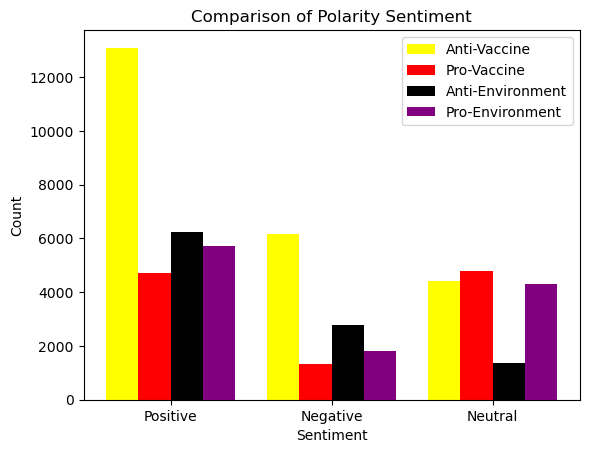

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Count sentiment labels for each dataset
anti_vacc_sentiments = anti_vacc['Pol_sent_clean'].value_counts().reindex(['Positive', 'Negative', 'Neutral'], fill_value=0)
pro_vacc_sentiments = pro_vacc['Pol_sent_clean'].value_counts().reindex(['Positive', 'Negative', 'Neutral'], fill_value=0)
anti_env_sentiments = anti_env['Pol_sent_clean'].value_counts().reindex(['Positive', 'Negative', 'Neutral'], fill_value=0)
pro_env_sentiments = pro_env['Pol_sent_clean'].value_counts().reindex(['Positive', 'Negative', 'Neutral'], fill_value=0)

# Plotting
bar_width = 0.2
index = np.arange(len(anti_vacc_sentiments))

plt.bar(index - 1.5*bar_width, anti_vacc_sentiments, bar_width, label='Anti-Vaccine', color='yellow')
plt.bar(index - 0.5*bar_width, pro_vacc_sentiments, bar_width, label='Pro-Vaccine', color='red')
plt.bar(index + 0.5*bar_width, anti_env_sentiments, bar_width, label='Anti-Environment', color='black')
plt.bar(index + 1.5*bar_width, pro_env_sentiments, bar_width, label='Pro-Environment', color='purple')

plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Comparison of Polarity Sentiment')
plt.xticks(index, ['Positive', 'Negative', 'Neutral'])
plt.legend()
plt.show()


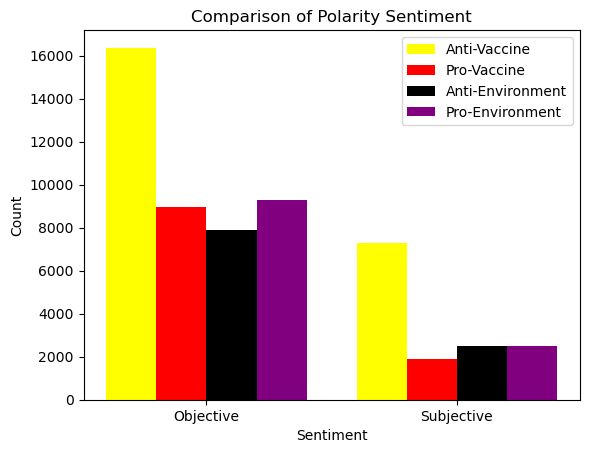

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Count sentiment labels for each dataset
anti_vacc_sentiments = anti_vacc['Sub_sent_clean'].value_counts().reindex(['Objective', 'Subjective'], fill_value=0)
pro_vacc_sentiments = pro_vacc['Sub_sent_clean'].value_counts().reindex(['Objective', 'Subjective'], fill_value=0)
anti_env_sentiments = anti_env['Sub_sent_clean'].value_counts().reindex(['Objective', 'Subjective'], fill_value=0)
pro_env_sentiments = pro_env['Sub_sent_clean'].value_counts().reindex(['Objective', 'Subjective'], fill_value=0)

# Plotting
bar_width = 0.2
index = np.arange(len(anti_vacc_sentiments))

plt.bar(index - 1.5*bar_width, anti_vacc_sentiments, bar_width, label='Anti-Vaccine', color='yellow')
plt.bar(index - 0.5*bar_width, pro_vacc_sentiments, bar_width, label='Pro-Vaccine', color='red')
plt.bar(index + 0.5*bar_width, anti_env_sentiments, bar_width, label='Anti-Environment', color='black')
plt.bar(index + 1.5*bar_width, pro_env_sentiments, bar_width, label='Pro-Environment', color='purple')

plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Comparison of Polarity Sentiment')
plt.xticks(index, ['Objective', 'Subjective'])
plt.legend()
plt.show()


# Each DataSet

# 1. Anti_Vaccine Dataset

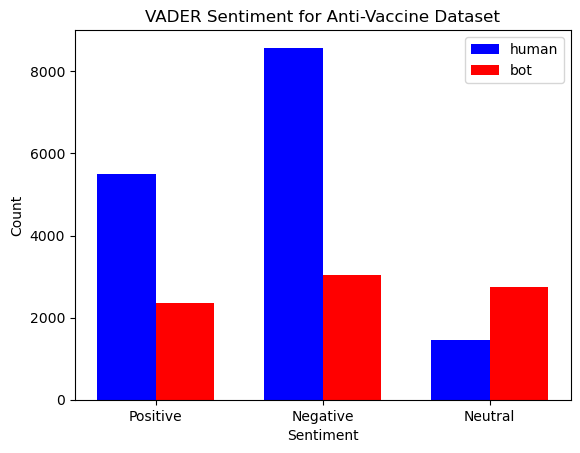

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the anti_vacc dataset
anti_vacc = pd.read_csv('sentiments_anti_vacc_corpus.csv', low_memory=False)

# Define labels and colors
labels = ['Positive', 'Negative', 'Neutral']
classifications = ['human', 'bot']
colors = {'human': 'blue', 'bot': 'red'}

# Group by classification and count sentiment labels for each group
grouped = anti_vacc.groupby(['classification', 'vad_sent']).size().unstack(fill_value=0)

# Plotting
bar_width = 0.35
index = np.arange(len(labels))

fig, ax = plt.subplots()

for i, classification in enumerate(classifications):
    counts = grouped.loc[classification].reindex(labels, fill_value=0)
    ax.bar(index + i*bar_width, counts, bar_width, label=classification, color=colors[classification])

ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
ax.set_title('VADER Sentiment for Anti-Vaccine Dataset')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


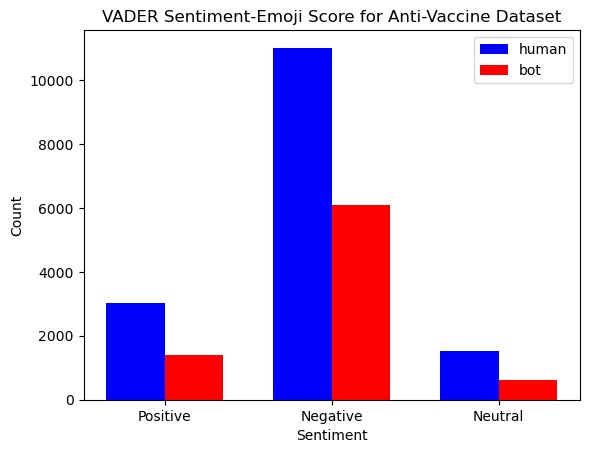

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the anti_vacc dataset
anti_vacc = pd.read_csv('sentiments_anti_vacc_corpus.csv', low_memory=False)

# Define labels and colors
labels = ['Positive', 'Negative', 'Neutral']
classifications = ['human', 'bot']
colors = {'human': 'blue', 'bot': 'red'}

# Group by classification and count sentiment labels for each group
grouped = anti_vacc.groupby(['classification', 'FullSents']).size().unstack(fill_value=0)

# Plotting
bar_width = 0.35
index = np.arange(len(labels))

fig, ax = plt.subplots()

for i, classification in enumerate(classifications):
    counts = grouped.loc[classification].reindex(labels, fill_value=0)
    ax.bar(index + i*bar_width, counts, bar_width, label=classification, color=colors[classification])

ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
ax.set_title('VADER Sentiment-Emoji Score for Anti-Vaccine Dataset')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


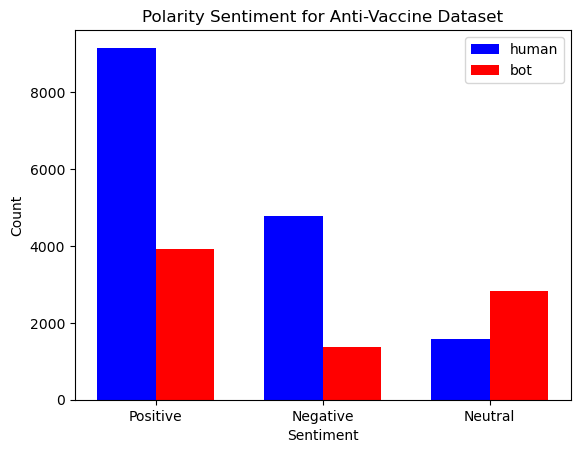

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the anti_vacc dataset
anti_vacc = pd.read_csv('sentiments_anti_vacc_corpus.csv', low_memory=False)

# Define labels and colors
labels = ['Positive', 'Negative', 'Neutral']
classifications = ['human', 'bot']
colors = {'human': 'blue', 'bot': 'red'}

# Group by classification and count sentiment labels for each group
grouped = anti_vacc.groupby(['classification', 'Pol_sent_clean']).size().unstack(fill_value=0)

# Plotting
bar_width = 0.35
index = np.arange(len(labels))

fig, ax = plt.subplots()

for i, classification in enumerate(classifications):
    counts = grouped.loc[classification].reindex(labels, fill_value=0)
    ax.bar(index + i*bar_width, counts, bar_width, label=classification, color=colors[classification])

ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
ax.set_title('Polarity Sentiment for Anti-Vaccine Dataset')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


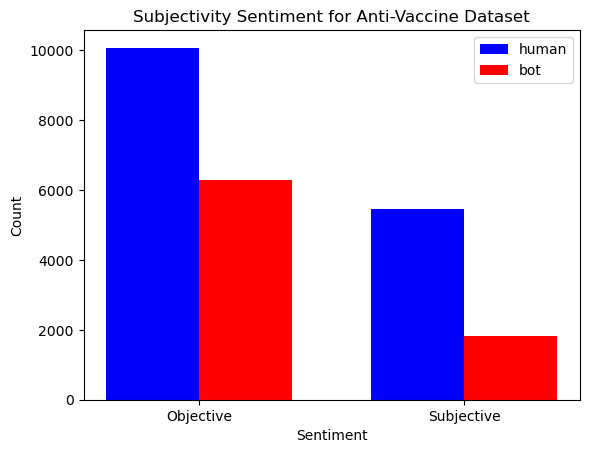

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the anti_vacc dataset
anti_vacc = pd.read_csv('sentiments_anti_vacc_corpus.csv', low_memory=False)

# Define labels and colors
labels = ['Objective', 'Subjective']
classifications = ['human', 'bot']
colors = {'human': 'blue', 'bot': 'red'}

# Group by classification and count sentiment labels for each group
grouped = anti_vacc.groupby(['classification', 'Sub_sent_clean']).size().unstack(fill_value=0)

# Plotting
bar_width = 0.35
index = np.arange(len(labels))

fig, ax = plt.subplots()

for i, classification in enumerate(classifications):
    counts = grouped.loc[classification].reindex(labels, fill_value=0)
    ax.bar(index + i*bar_width, counts, bar_width, label=classification, color=colors[classification])

ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
ax.set_title('Subjectivity Sentiment for Anti-Vaccine Dataset')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


# 2. Anti Env Datasets

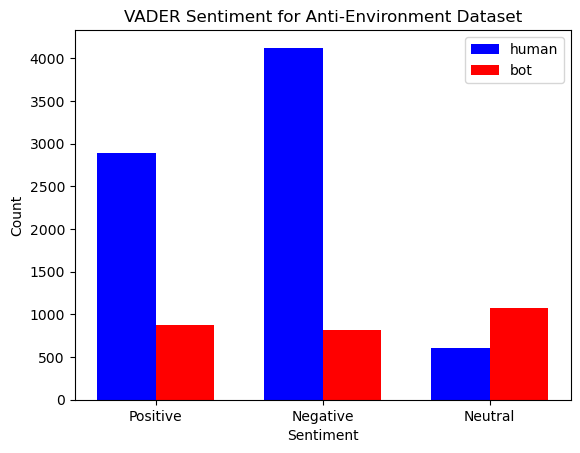

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the anti_vacc dataset
anti_env = pd.read_csv('sentiments_anti_env_corpus.csv', low_memory=False)

# Define labels and colors
labels = ['Positive', 'Negative', 'Neutral']
classifications = ['human', 'bot']
colors = {'human': 'blue', 'bot': 'red'}

# Group by classification and count sentiment labels for each group
grouped = anti_env.groupby(['classification', 'vad_sent']).size().unstack(fill_value=0)

# Plotting
bar_width = 0.35
index = np.arange(len(labels))

fig, ax = plt.subplots()

for i, classification in enumerate(classifications):
    counts = grouped.loc[classification].reindex(labels, fill_value=0)
    ax.bar(index + i*bar_width, counts, bar_width, label=classification, color=colors[classification])

ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
ax.set_title('VADER Sentiment for Anti-Environment Dataset')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


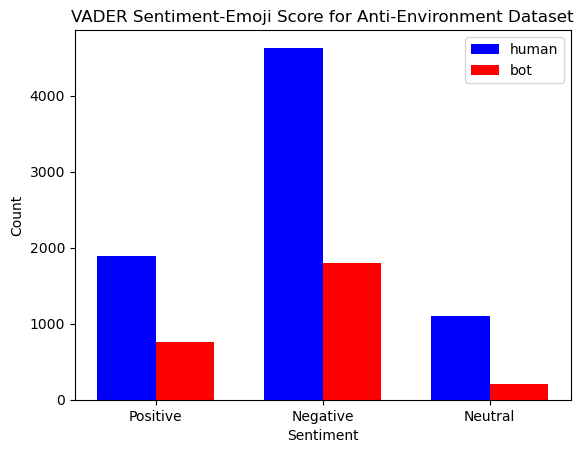

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the anti_vacc dataset
anti_env = pd.read_csv('sentiments_anti_env_corpus.csv', low_memory=False)

# Define labels and colors
labels = ['Positive', 'Negative', 'Neutral']
classifications = ['human', 'bot']
colors = {'human': 'blue', 'bot': 'red'}

# Group by classification and count sentiment labels for each group
grouped = anti_env.groupby(['classification', 'FullSents']).size().unstack(fill_value=0)

# Plotting
bar_width = 0.35
index = np.arange(len(labels))

fig, ax = plt.subplots()

for i, classification in enumerate(classifications):
    counts = grouped.loc[classification].reindex(labels, fill_value=0)
    ax.bar(index + i*bar_width, counts, bar_width, label=classification, color=colors[classification])

ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
ax.set_title('VADER Sentiment-Emoji Score for Anti-Environment Dataset')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


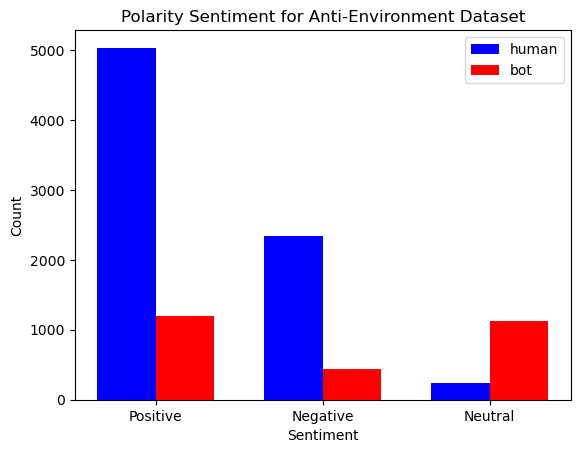

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the anti_vacc dataset
anti_env = pd.read_csv('sentiments_anti_env_corpus.csv', low_memory=False)

# Define labels and colors
labels = ['Positive', 'Negative', 'Neutral']
classifications = ['human', 'bot']
colors = {'human': 'blue', 'bot': 'red'}

# Group by classification and count sentiment labels for each group
grouped = anti_env.groupby(['classification', 'Pol_sent_clean']).size().unstack(fill_value=0)

# Plotting
bar_width = 0.35
index = np.arange(len(labels))

fig, ax = plt.subplots()

for i, classification in enumerate(classifications):
    counts = grouped.loc[classification].reindex(labels, fill_value=0)
    ax.bar(index + i*bar_width, counts, bar_width, label=classification, color=colors[classification])

ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
ax.set_title('Polarity Sentiment for Anti-Environment Dataset')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


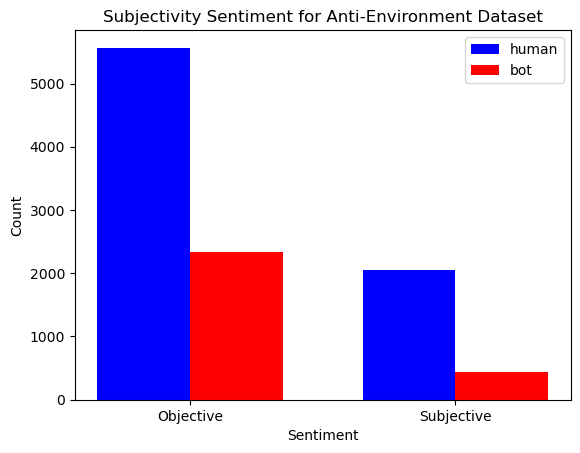

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the anti_vacc dataset
anti_env = pd.read_csv('sentiments_anti_env_corpus.csv', low_memory=False)

# Define labels and colors
labels = ['Objective', 'Subjective']
classifications = ['human', 'bot']
colors = {'human': 'blue', 'bot': 'red'}

# Group by classification and count sentiment labels for each group
grouped = anti_env.groupby(['classification', 'Sub_sent_clean']).size().unstack(fill_value=0)

# Plotting
bar_width = 0.35
index = np.arange(len(labels))

fig, ax = plt.subplots()

for i, classification in enumerate(classifications):
    counts = grouped.loc[classification].reindex(labels, fill_value=0)
    ax.bar(index + i*bar_width, counts, bar_width, label=classification, color=colors[classification])

ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
ax.set_title('Subjectivity Sentiment for Anti-Environment Dataset')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


# Pro Environment

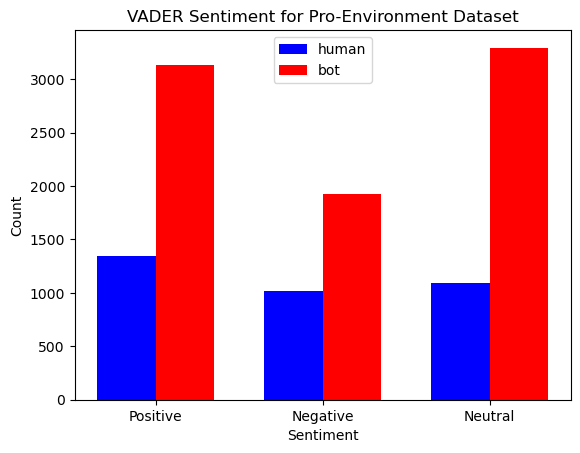

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the anti_vacc dataset
pro_env = pd.read_csv('sentiments_pro_env_corpus.csv', low_memory=False)

# Define labels and colors
labels = ['Positive', 'Negative', 'Neutral']
classifications = ['human', 'bot']
colors = {'human': 'blue', 'bot': 'red'}

# Group by classification and count sentiment labels for each group
grouped = pro_env.groupby(['classification', 'vad_sent']).size().unstack(fill_value=0)

# Plotting
bar_width = 0.35
index = np.arange(len(labels))

fig, ax = plt.subplots()

for i, classification in enumerate(classifications):
    counts = grouped.loc[classification].reindex(labels, fill_value=0)
    ax.bar(index + i*bar_width, counts, bar_width, label=classification, color=colors[classification])

ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
ax.set_title('VADER Sentiment for Pro-Environment Dataset')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


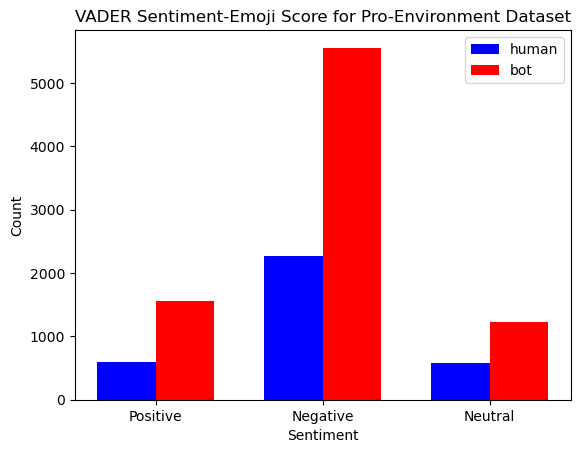

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the anti_vacc dataset
pro_env = pd.read_csv('sentiments_pro_env_corpus.csv', low_memory=False)

# Define labels and colors
labels = ['Positive', 'Negative', 'Neutral']
classifications = ['human', 'bot']
colors = {'human': 'blue', 'bot': 'red'}

# Group by classification and count sentiment labels for each group
grouped = pro_env.groupby(['classification', 'FullSents']).size().unstack(fill_value=0)

# Plotting
bar_width = 0.35
index = np.arange(len(labels))

fig, ax = plt.subplots()

for i, classification in enumerate(classifications):
    counts = grouped.loc[classification].reindex(labels, fill_value=0)
    ax.bar(index + i*bar_width, counts, bar_width, label=classification, color=colors[classification])

ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
ax.set_title('VADER Sentiment-Emoji Score for Pro-Environment Dataset')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


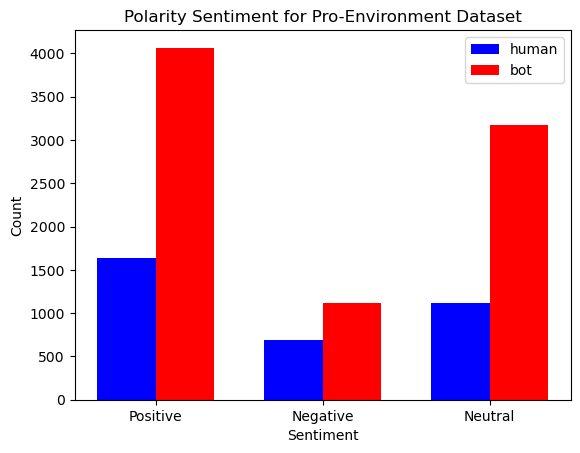

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the anti_vacc dataset
pro_env = pd.read_csv('sentiments_pro_env_corpus.csv', low_memory=False)

# Define labels and colors
labels = ['Positive', 'Negative', 'Neutral']
classifications = ['human', 'bot']
colors = {'human': 'blue', 'bot': 'red'}

# Group by classification and count sentiment labels for each group
grouped = pro_env.groupby(['classification', 'Pol_sent_clean']).size().unstack(fill_value=0)

# Plotting
bar_width = 0.35
index = np.arange(len(labels))

fig, ax = plt.subplots()

for i, classification in enumerate(classifications):
    counts = grouped.loc[classification].reindex(labels, fill_value=0)
    ax.bar(index + i*bar_width, counts, bar_width, label=classification, color=colors[classification])

ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
ax.set_title('Polarity Sentiment for Pro-Environment Dataset')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


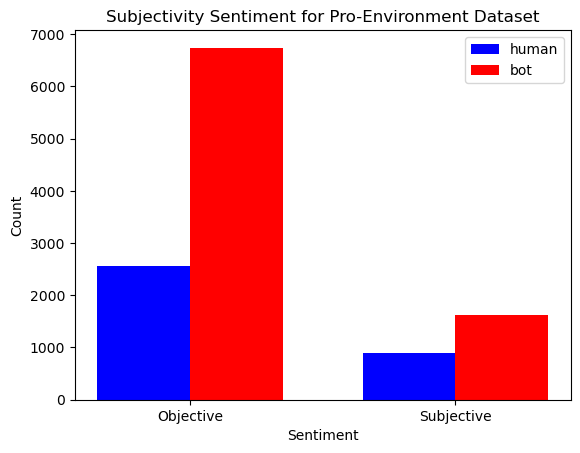

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the anti_vacc dataset
pro_env = pd.read_csv('sentiments_pro_env_corpus.csv', low_memory=False)

# Define labels and colors
labels = ['Objective', 'Subjective']
classifications = ['human', 'bot']
colors = {'human': 'blue', 'bot': 'red'}

# Group by classification and count sentiment labels for each group
grouped = pro_env.groupby(['classification', 'Sub_sent_clean']).size().unstack(fill_value=0)

# Plotting
bar_width = 0.35
index = np.arange(len(labels))

fig, ax = plt.subplots()

for i, classification in enumerate(classifications):
    counts = grouped.loc[classification].reindex(labels, fill_value=0)
    ax.bar(index + i*bar_width, counts, bar_width, label=classification, color=colors[classification])

ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
ax.set_title('Subjectivity Sentiment for Pro-Environment Dataset')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


# Anti_Environment

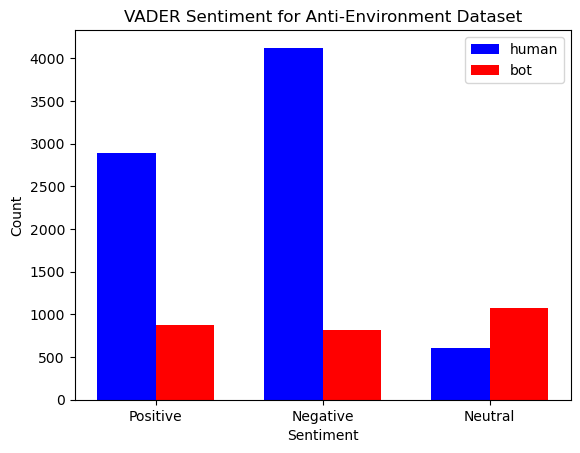

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the anti_vacc dataset
anti_env = pd.read_csv('sentiments_anti_env_corpus.csv', low_memory=False)

# Define labels and colors
labels = ['Positive', 'Negative', 'Neutral']
classifications = ['human', 'bot']
colors = {'human': 'blue', 'bot': 'red'}

# Group by classification and count sentiment labels for each group
grouped = anti_env.groupby(['classification', 'vad_sent']).size().unstack(fill_value=0)

# Plotting
bar_width = 0.35
index = np.arange(len(labels))

fig, ax = plt.subplots()

for i, classification in enumerate(classifications):
    counts = grouped.loc[classification].reindex(labels, fill_value=0)
    ax.bar(index + i*bar_width, counts, bar_width, label=classification, color=colors[classification])

ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
ax.set_title('VADER Sentiment for Anti-Environment Dataset')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


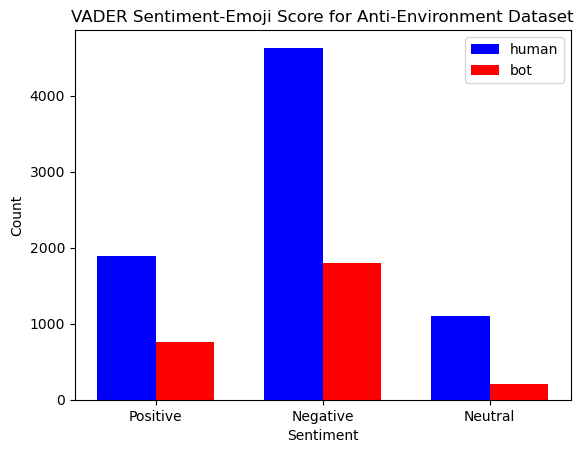

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the anti_vacc dataset
anti_env = pd.read_csv('sentiments_anti_env_corpus.csv', low_memory=False)

# Define labels and colors
labels = ['Positive', 'Negative', 'Neutral']
classifications = ['human', 'bot']
colors = {'human': 'blue', 'bot': 'red'}

# Group by classification and count sentiment labels for each group
grouped = anti_env.groupby(['classification', 'FullSents']).size().unstack(fill_value=0)

# Plotting
bar_width = 0.35
index = np.arange(len(labels))

fig, ax = plt.subplots()

for i, classification in enumerate(classifications):
    counts = grouped.loc[classification].reindex(labels, fill_value=0)
    ax.bar(index + i*bar_width, counts, bar_width, label=classification, color=colors[classification])

ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
ax.set_title('VADER Sentiment-Emoji Score for Anti-Environment Dataset')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


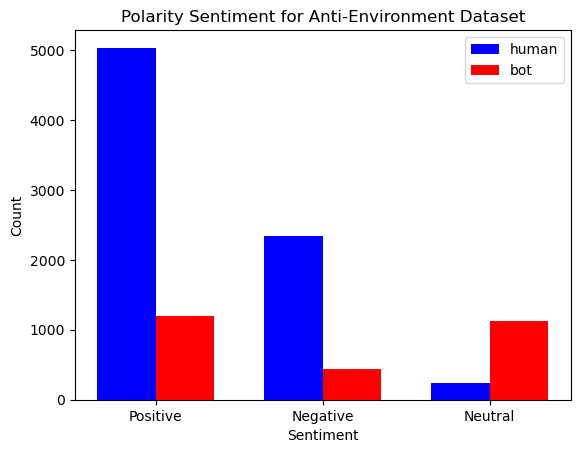

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the anti_vacc dataset
anti_env = pd.read_csv('sentiments_anti_env_corpus.csv', low_memory=False)

# Define labels and colors
labels = ['Positive', 'Negative', 'Neutral']
classifications = ['human', 'bot']
colors = {'human': 'blue', 'bot': 'red'}

# Group by classification and count sentiment labels for each group
grouped = anti_env.groupby(['classification', 'Pol_sent_clean']).size().unstack(fill_value=0)

# Plotting
bar_width = 0.35
index = np.arange(len(labels))

fig, ax = plt.subplots()

for i, classification in enumerate(classifications):
    counts = grouped.loc[classification].reindex(labels, fill_value=0)
    ax.bar(index + i*bar_width, counts, bar_width, label=classification, color=colors[classification])

ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
ax.set_title('Polarity Sentiment for Anti-Environment Dataset')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


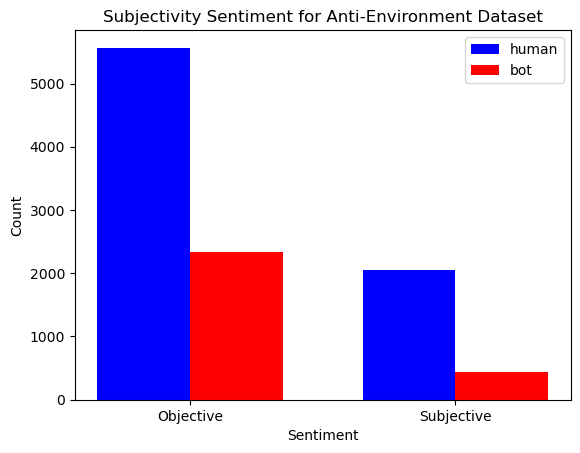

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the anti_vacc dataset
anti_env = pd.read_csv('sentiments_anti_env_corpus.csv', low_memory=False)

# Define labels and colors
labels = ['Objective', 'Subjective']
classifications = ['human', 'bot']
colors = {'human': 'blue', 'bot': 'red'}

# Group by classification and count sentiment labels for each group
grouped = anti_env.groupby(['classification', 'Sub_sent_clean']).size().unstack(fill_value=0)

# Plotting
bar_width = 0.35
index = np.arange(len(labels))

fig, ax = plt.subplots()

for i, classification in enumerate(classifications):
    counts = grouped.loc[classification].reindex(labels, fill_value=0)
    ax.bar(index + i*bar_width, counts, bar_width, label=classification, color=colors[classification])

ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
ax.set_title('Subjectivity Sentiment for Anti-Environment Dataset')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


In [1]:
import pandas as pd
anti_vacc = pd.read_csv('sentiments_anti_vacc_corpus.csv', low_memory=False)

In [3]:
anti_vacc

,date,sender_username_x,sender_first_name_x,sender_last_name_x,views,emoji_reactions,sender_username_y,sender_first_name_y,sender_last_name_y,IDs,...,Pol_sent_clean,Sub_sent_clean,vad_score,vad_comp,vad_sent,emo_core,norm_vader,norm_emo,combined_score,FullSents
0,2020-08-02 01:19:10+00:00,real_DonaldJTrump,NaN,NaN,1172.0,NaN,NaN,NaN,NaN,9536,...,Positive,Subjective,"{'neg': 0.123, 'neu': 0.661, 'pos': 0.216, 'co...",0.6369,Positive,0.0,0.6369,-0.683952,0.108559,Positive
1,2021-04-18 02:44:23+00:00,real_DonaldJTrump,NaN,NaN,576411.0,ReactionEmoji(emoticon='❤') 4,NaN,NaN,NaN,13471,...,Negative,Subjective,"{'neg': 0.13, 'neu': 0.814, 'pos': 0.056, 'com...",-0.8432,Negative,2.8,-0.8432,-0.683465,-0.779306,Negative
2,2022-01-06 00:35:12+00:00,real_DonaldJTrump,NaN,NaN,366663.0,ReactionEmoji(emoticon='❤') 7230,NaN,NaN,NaN,14400,...,Positive,Subjective,"{'neg': 0.041, 'neu': 0.872, 'pos': 0.087, 'co...",0.9156,Positive,5061.0,0.9156,0.195679,0.627632,Positive
3,2022-07-18 06:07:34+00:00,real_DonaldJTrump,NaN,NaN,274931.0,ReactionEmoji(emoticon='❤') 13841,NaN,NaN,NaN,14939,...,Neutral,Objective,"{'neg': 0.333, 'neu': 0.667, 'pos': 0.0, 'comp...",-0.6705,Negative,9688.7,-0.6705,1.000000,-0.002300,Neutral
4,2022-02-16 19:57:12+00:00,DrRobertMalone,NaN,NaN,22041.0,NaN,NaN,NaN,NaN,17,...,Negative,Objective,"{'neg': 0.168, 'neu': 0.595, 'pos': 0.238, 'co...",0.0772,Neutral,0.0,0.0772,-0.683952,-0.227261,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23668,2023-07-26 00:48:50+00:00,zero_anthropology,NaN,NaN,86.0,ReactionEmoji(emoticon='👍') 2,NaN,NaN,NaN,10484,...,Positive,Subjective,"{'neg': 0.075, 'neu': 0.813, 'pos': 0.112, 'co...",0.8554,Positive,1.0,0.8554,-0.683778,0.239729,Positive
23669,2023-07-27 02:16:33+00:00,zero_anthropology,NaN,NaN,63.0,ReactionEmoji(emoticon='❤') 2,NaN,NaN,NaN,10488,...,Positive,Objective,"{'neg': 0.088, 'neu': 0.847, 'pos': 0.065, 'co...",-0.9655,Negative,1.4,-0.9655,-0.683708,-0.852783,Negative
23670,2023-07-27 02:22:56+00:00,zero_anthropology,NaN,NaN,53.0,ReactionEmoji(emoticon='👍') 3,NaN,Piet,Preston,10490\n25513,...,Positive,Objective,"{'neg': 0.062, 'neu': 0.78, 'pos': 0.157, 'com...",0.9908,Positive,1.5,0.9908,-0.683691,0.321004,Positive
23671,2023-07-27 02:33:45+00:00,zero_anthropology,NaN,NaN,63.0,ReactionEmoji(emoticon='👍') 2,NaN,NaN,NaN,10492,...,Positive,Objective,"{'neg': 0.104, 'neu': 0.858, 'pos': 0.038, 'co...",-0.9446,Negative,1.0,-0.9446,-0.683778,-0.840271,Negative


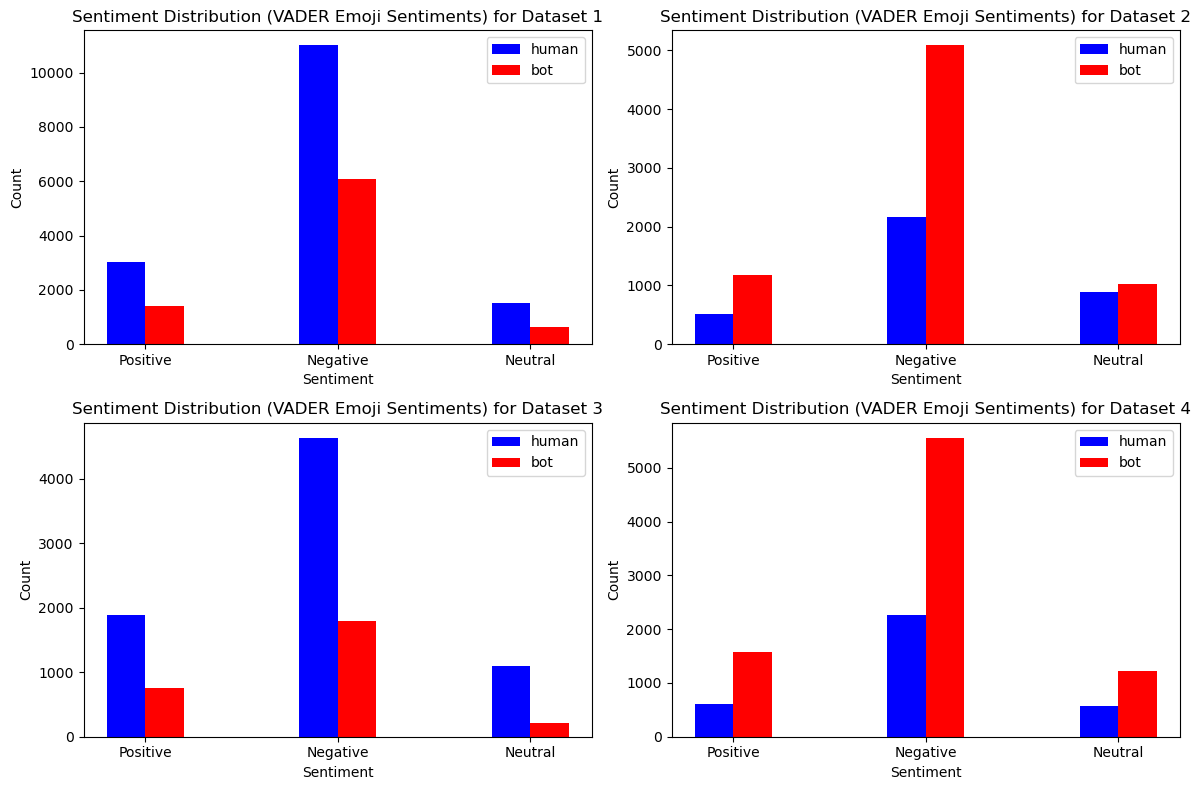

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load all four datasets
anti_vacc = pd.read_csv('sentiments_anti_vacc_corpus.csv', low_memory=False)
pro_vacc = pd.read_csv('sentiments_pro_vacc_corpus.csv', low_memory=False)
anti_env = pd.read_csv('sentiments_anti_env_corpus.csv', low_memory=False)
pro_env = pd.read_csv('sentiments_pro_env_corpus.csv', low_memory=False)

# Define labels and colors
labels = ['Positive', 'Negative', 'Neutral']
classifications = ['human', 'bot']
colors = {'human': 'blue', 'bot': 'red'}

datasets = [anti_vacc, pro_vacc, anti_env, pro_env]

# Plotting
bar_width = 0.2
index = np.arange(len(labels))

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()

for i, dataset in enumerate(datasets):
    # Group by classification and count sentiment labels for each group
    grouped = dataset.groupby(['classification', 'FullSents']).size().unstack(fill_value=0)

    for j, classification in enumerate(classifications):
        counts = grouped.loc[classification].reindex(labels, fill_value=0)
        axs[i].bar(index + j*bar_width, counts, bar_width, label=classification, color=colors[classification])

    axs[i].set_xlabel('Sentiment')
    axs[i].set_ylabel('Count')
    axs[i].set_title(f'Sentiment Distribution (VADER Emoji Sentiments) for Dataset {i+1}')
    axs[i].set_xticks(index + bar_width / 2)
    axs[i].set_xticklabels(labels)
    axs[i].legend()

plt.tight_layout()
plt.show()


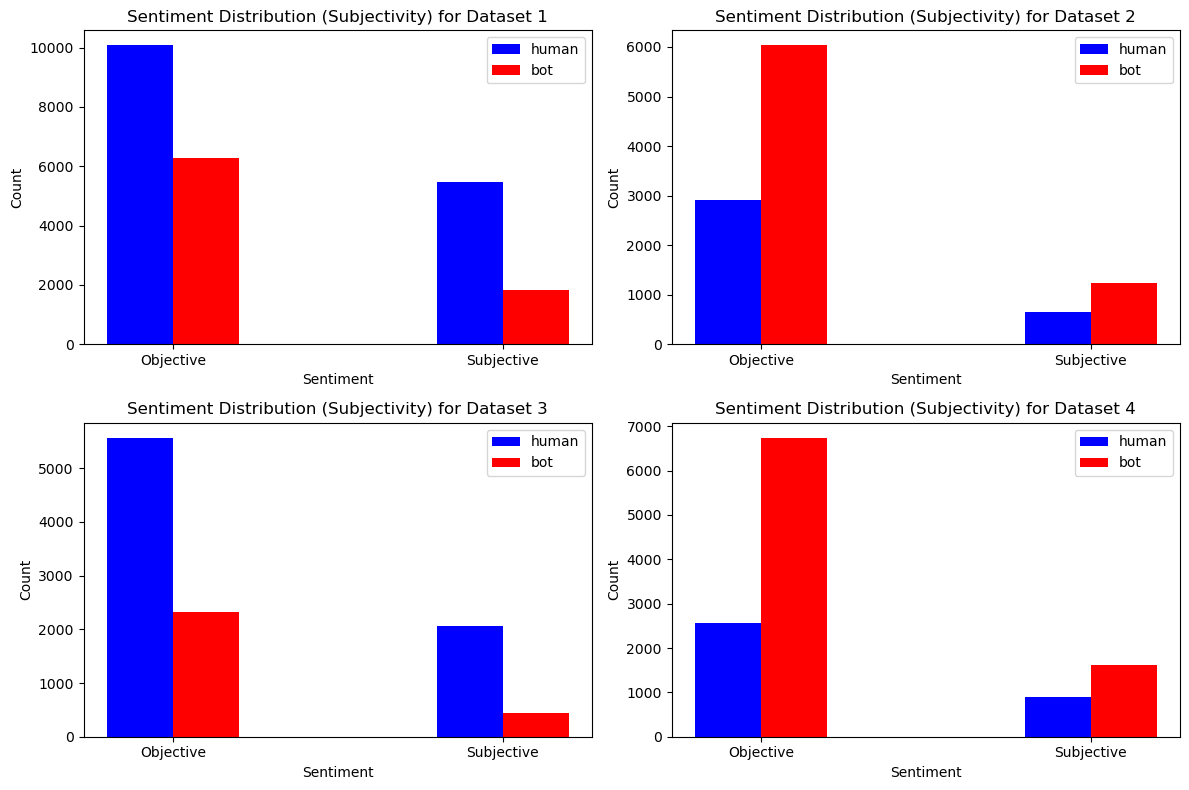

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load all four datasets
anti_vacc = pd.read_csv('sentiments_anti_vacc_corpus.csv', low_memory=False)
pro_vacc = pd.read_csv('sentiments_pro_vacc_corpus.csv', low_memory=False)
anti_env = pd.read_csv('sentiments_anti_env_corpus.csv', low_memory=False)
pro_env = pd.read_csv('sentiments_pro_env_corpus.csv', low_memory=False)

# Define labels and colors
labels = ['Objective', 'Subjective']
classifications = ['human', 'bot']
colors = {'human': 'blue', 'bot': 'red'}

datasets = [anti_vacc, pro_vacc, anti_env, pro_env]

# Plotting
bar_width = 0.2
index = np.arange(len(labels))

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()

for i, dataset in enumerate(datasets):
    # Group by classification and count sentiment labels for each group
    grouped = dataset.groupby(['classification', 'Sub_sent_clean']).size().unstack(fill_value=0)

    for j, classification in enumerate(classifications):
        counts = grouped.loc[classification].reindex(labels, fill_value=0)
        axs[i].bar(index + j*bar_width, counts, bar_width, label=classification, color=colors[classification])

    axs[i].set_xlabel('Sentiment')
    axs[i].set_ylabel('Count')
    axs[i].set_title(f'Sentiment Distribution (Subjectivity) for Dataset {i+1}')
    axs[i].set_xticks(index + bar_width / 2)
    axs[i].set_xticklabels(labels)
    axs[i].legend()

plt.tight_layout()
plt.show()


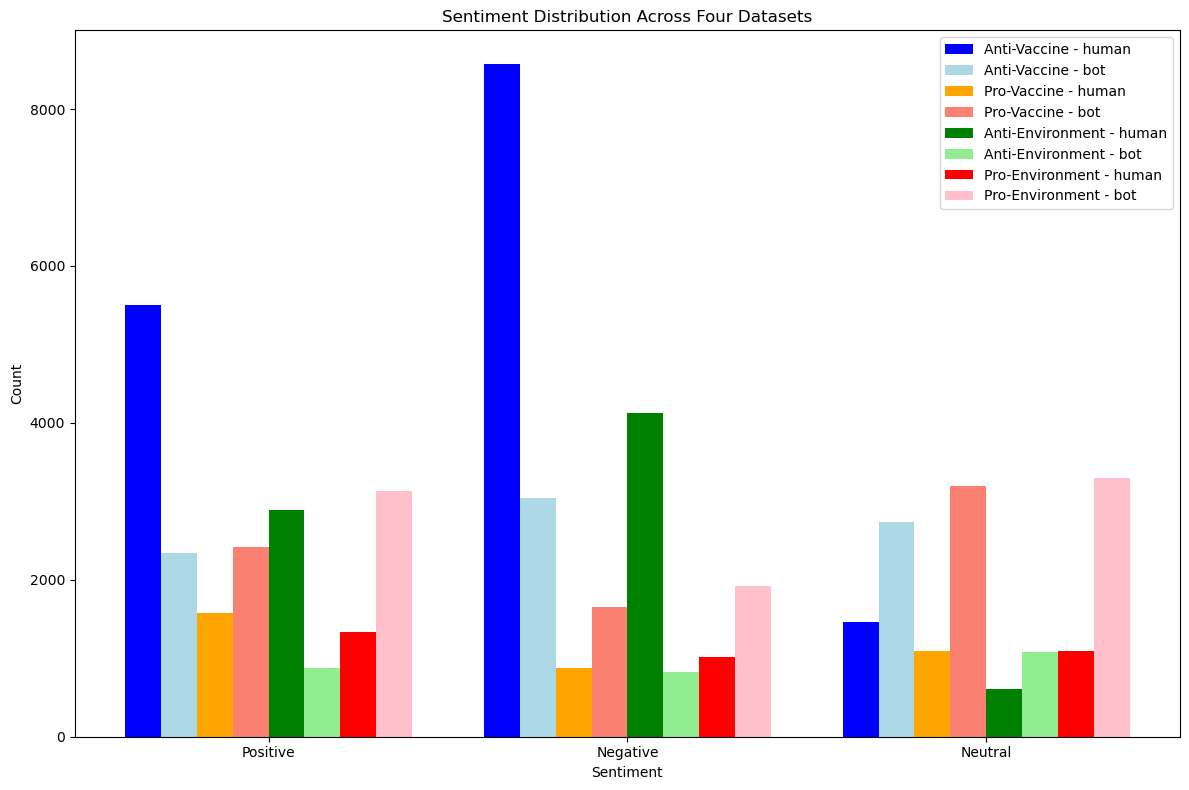

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load all four datasets
anti_vacc = pd.read_csv('sentiments_anti_vacc_corpus.csv', low_memory=False)
pro_vacc = pd.read_csv('sentiments_pro_vacc_corpus.csv', low_memory=False)
anti_env = pd.read_csv('sentiments_anti_env_corpus.csv', low_memory=False)
pro_env = pd.read_csv('sentiments_pro_env_corpus.csv', low_memory=False)

# Define labels and colors
labels = ['Positive', 'Negative', 'Neutral']
classifications = ['human', 'bot']
dataset_names = ['Anti-Vaccine', 'Pro-Vaccine', 'Anti-Environment', 'Pro-Environment']

# Define a color map for each dataset and classification combination
colors = {
    ('Anti-Vaccine', 'human'): 'blue', 
    ('Anti-Vaccine', 'bot'): 'lightblue', 
    ('Pro-Vaccine', 'human'): 'orange', 
    ('Pro-Vaccine', 'bot'): 'salmon', 
    ('Anti-Environment', 'human'): 'green', 
    ('Anti-Environment', 'bot'): 'lightgreen', 
    ('Pro-Environment', 'human'): 'red', 
    ('Pro-Environment', 'bot'): 'pink'
}

# Plotting
bar_width = 0.1
index = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(12, 8))

for i, dataset in enumerate([anti_vacc, pro_vacc, anti_env, pro_env]):
    # Group by classification and count sentiment labels for each group
    grouped = dataset.groupby(['classification', 'vad_sent']).size().unstack(fill_value=0)

    for j, classification in enumerate(classifications):
        counts = grouped.loc[classification].reindex(labels, fill_value=0)
        ax.bar(index + (i * len(classifications) + j) * bar_width, counts, bar_width, label=f'{dataset_names[i]} - {classification}', color=colors[(dataset_names[i], classification)])

ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
ax.set_title('Sentiment Distribution Across Four Datasets')
ax.set_xticks(index + (len(datasets) * len(classifications) / 2 - 0.5) * bar_width)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()


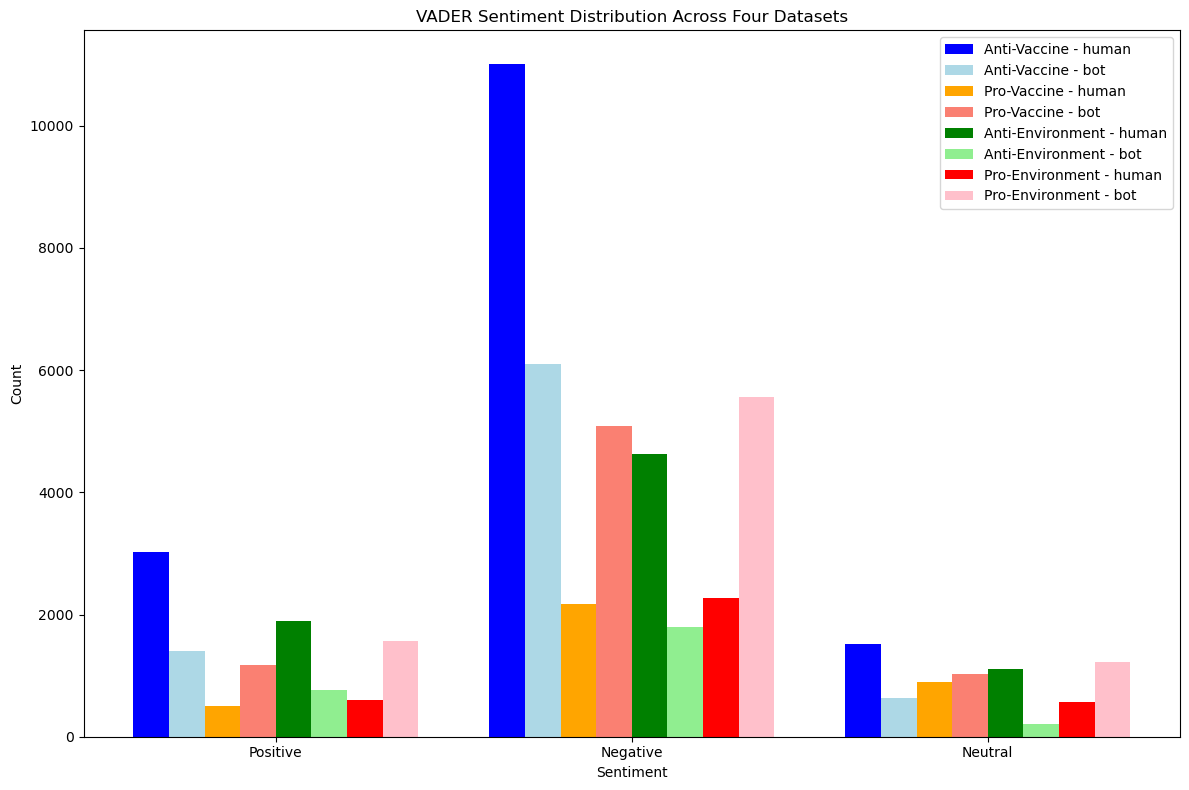

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load all four datasets
anti_vacc = pd.read_csv('sentiments_anti_vacc_corpus.csv', low_memory=False)
pro_vacc = pd.read_csv('sentiments_pro_vacc_corpus.csv', low_memory=False)
anti_env = pd.read_csv('sentiments_anti_env_corpus.csv', low_memory=False)
pro_env = pd.read_csv('sentiments_pro_env_corpus.csv', low_memory=False)

# Define labels and colors
labels = ['Positive', 'Negative', 'Neutral']
classifications = ['human', 'bot']
dataset_names = ['Anti-Vaccine', 'Pro-Vaccine', 'Anti-Environment', 'Pro-Environment']

# Define a color map for each dataset and classification combination
colors = {
    ('Anti-Vaccine', 'human'): 'blue', 
    ('Anti-Vaccine', 'bot'): 'lightblue', 
    ('Pro-Vaccine', 'human'): 'orange', 
    ('Pro-Vaccine', 'bot'): 'salmon', 
    ('Anti-Environment', 'human'): 'green', 
    ('Anti-Environment', 'bot'): 'lightgreen', 
    ('Pro-Environment', 'human'): 'red', 
    ('Pro-Environment', 'bot'): 'pink'
}

# Plotting
bar_width = 0.1
index = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(12, 8))

for i, dataset in enumerate([anti_vacc, pro_vacc, anti_env, pro_env]):
    # Group by classification and count sentiment labels for each group
    grouped = dataset.groupby(['classification', 'FullSents']).size().unstack(fill_value=0)

    for j, classification in enumerate(classifications):
        counts = grouped.loc[classification].reindex(labels, fill_value=0)
        ax.bar(index + (i * len(classifications) + j) * bar_width, counts, bar_width, label=f'{dataset_names[i]} - {classification}', color=colors[(dataset_names[i], classification)])

ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
ax.set_title('VADER Sentiment Distribution Across Four Datasets')
ax.set_xticks(index + (len(datasets) * len(classifications) / 2 - 0.5) * bar_width)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()


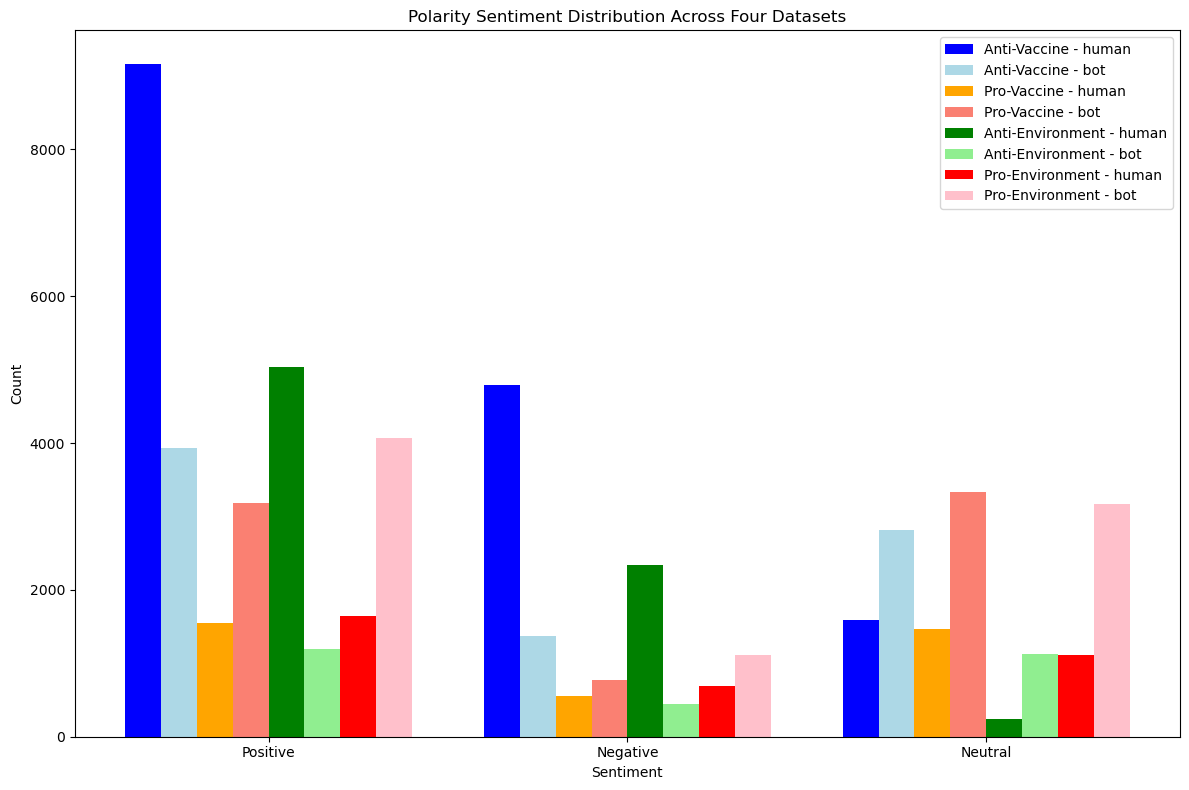

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load all four datasets
anti_vacc = pd.read_csv('sentiments_anti_vacc_corpus.csv', low_memory=False)
pro_vacc = pd.read_csv('sentiments_pro_vacc_corpus.csv', low_memory=False)
anti_env = pd.read_csv('sentiments_anti_env_corpus.csv', low_memory=False)
pro_env = pd.read_csv('sentiments_pro_env_corpus.csv', low_memory=False)

# Define labels and colors
labels = ['Positive', 'Negative', 'Neutral']
classifications = ['human', 'bot']
dataset_names = ['Anti-Vaccine', 'Pro-Vaccine', 'Anti-Environment', 'Pro-Environment']

# Define a color map for each dataset and classification combination
colors = {
    ('Anti-Vaccine', 'human'): 'blue', 
    ('Anti-Vaccine', 'bot'): 'lightblue', 
    ('Pro-Vaccine', 'human'): 'orange', 
    ('Pro-Vaccine', 'bot'): 'salmon', 
    ('Anti-Environment', 'human'): 'green', 
    ('Anti-Environment', 'bot'): 'lightgreen', 
    ('Pro-Environment', 'human'): 'red', 
    ('Pro-Environment', 'bot'): 'pink'
}

# Plotting
bar_width = 0.1
index = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(12, 8))

for i, dataset in enumerate([anti_vacc, pro_vacc, anti_env, pro_env]):
    # Group by classification and count sentiment labels for each group
    grouped = dataset.groupby(['classification', 'Pol_sent_clean']).size().unstack(fill_value=0)

    for j, classification in enumerate(classifications):
        counts = grouped.loc[classification].reindex(labels, fill_value=0)
        ax.bar(index + (i * len(classifications) + j) * bar_width, counts, bar_width, label=f'{dataset_names[i]} - {classification}', color=colors[(dataset_names[i], classification)])

ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
ax.set_title('Polarity Sentiment Distribution Across Four Datasets')
ax.set_xticks(index + (len(datasets) * len(classifications) / 2 - 0.5) * bar_width)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()


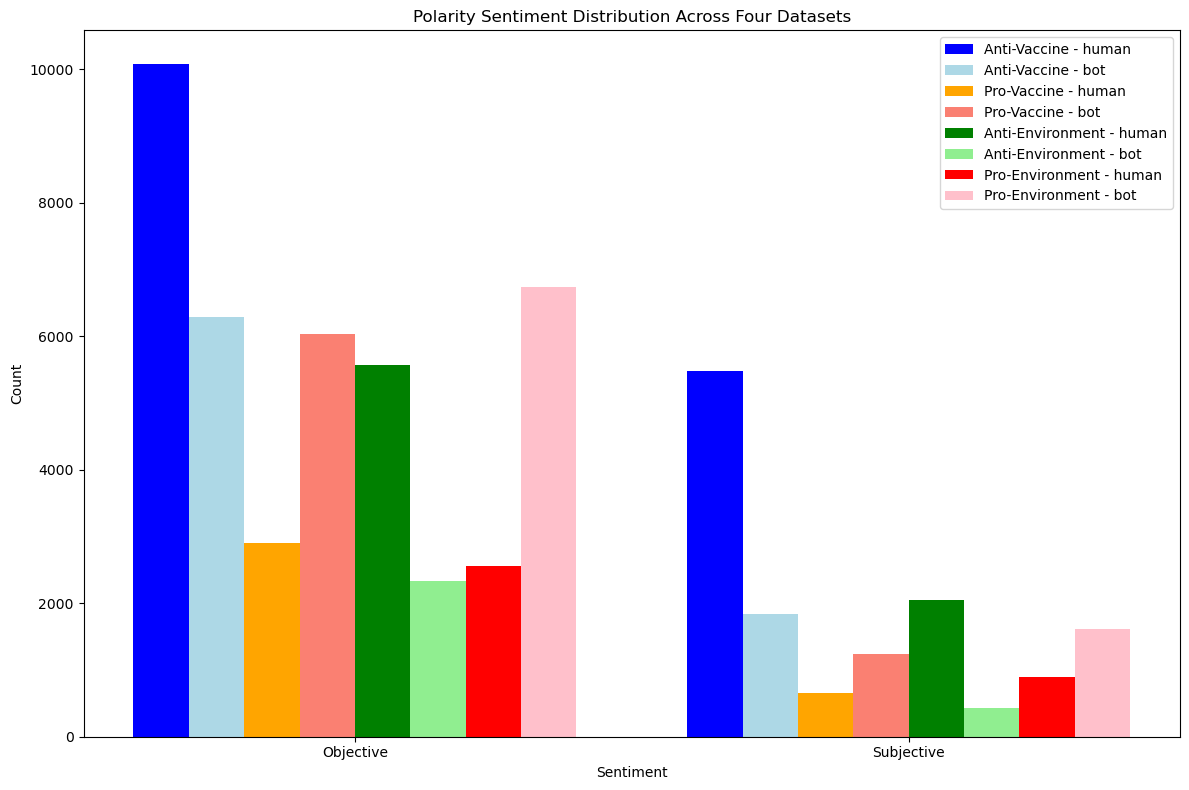

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load all four datasets
anti_vacc = pd.read_csv('sentiments_anti_vacc_corpus.csv', low_memory=False)
pro_vacc = pd.read_csv('sentiments_pro_vacc_corpus.csv', low_memory=False)
anti_env = pd.read_csv('sentiments_anti_env_corpus.csv', low_memory=False)
pro_env = pd.read_csv('sentiments_pro_env_corpus.csv', low_memory=False)

# Define labels and colors
labels = ['Objective', 'Subjective']
classifications = ['human', 'bot']
dataset_names = ['Anti-Vaccine', 'Pro-Vaccine', 'Anti-Environment', 'Pro-Environment']

# Define a color map for each dataset and classification combination
colors = {
    ('Anti-Vaccine', 'human'): 'blue', 
    ('Anti-Vaccine', 'bot'): 'lightblue', 
    ('Pro-Vaccine', 'human'): 'orange', 
    ('Pro-Vaccine', 'bot'): 'salmon', 
    ('Anti-Environment', 'human'): 'green', 
    ('Anti-Environment', 'bot'): 'lightgreen', 
    ('Pro-Environment', 'human'): 'red', 
    ('Pro-Environment', 'bot'): 'pink'
}

# Plotting
bar_width = 0.1
index = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(12, 8))

for i, dataset in enumerate([anti_vacc, pro_vacc, anti_env, pro_env]):
    # Group by classification and count sentiment labels for each group
    grouped = dataset.groupby(['classification', 'Sub_sent_clean']).size().unstack(fill_value=0)

    for j, classification in enumerate(classifications):
        counts = grouped.loc[classification].reindex(labels, fill_value=0)
        ax.bar(index + (i * len(classifications) + j) * bar_width, counts, bar_width, label=f'{dataset_names[i]} - {classification}', color=colors[(dataset_names[i], classification)])

ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
ax.set_title('Polarity Sentiment Distribution Across Four Datasets')
ax.set_xticks(index + (len(datasets) * len(classifications) / 2 - 0.5) * bar_width)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()
